In [1]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.io.ascii as at

In [2]:
stars = at.read("sdss_mags.csv")
# Visually check if the possible colors are matplotlib-compatible
print(np.unique(stars["color"]))

color 
------
  blue
orange
   red
 white
yellow


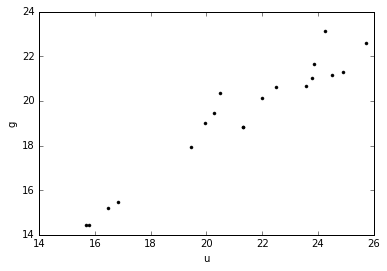

In [3]:
# Try plotting one magnitude against another
plt.plot(stars['u'],stars['g'],'k.')
plt.xlabel("u")
plt.ylabel("g")

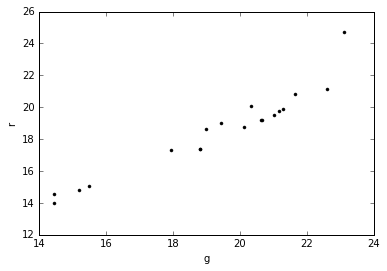

In [4]:
plt.plot(stars['g'],stars['r'],'k.')
plt.xlabel("g")
plt.ylabel("r")

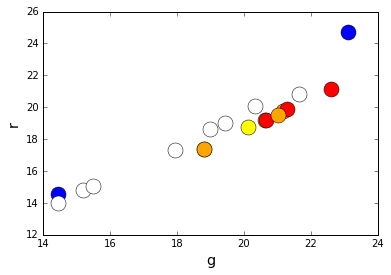

In [5]:
# Plot one magnitude against another, but this time color the stars by their visibly-identified color
for g, r, c in itertools.izip(stars["g"],stars["r"],stars["color"]):
    plt.plot(g,r,'o',mfc=c,ms=15)
plt.xlabel("g",fontsize="x-large")
plt.ylabel("r",fontsize="x-large")

In [6]:
# Define the 5 SDSS bands and their central wavelengths
bands = ["u","g","r","i","z"]
central_wavelengths = [3543,4770,6231,7625,9134]

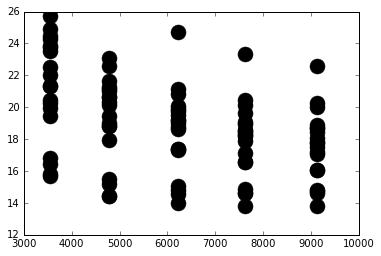

In [7]:
# Plot the magnitudes vs. the appropriate central wavelengths for each filter
for i,b in enumerate(bands):
    plt.plot(np.ones(len(stars))*central_wavelengths[i],stars[b],'ko',ms=15)

In [8]:
# Also attempted the above with colored points, but it was not any more decipherable

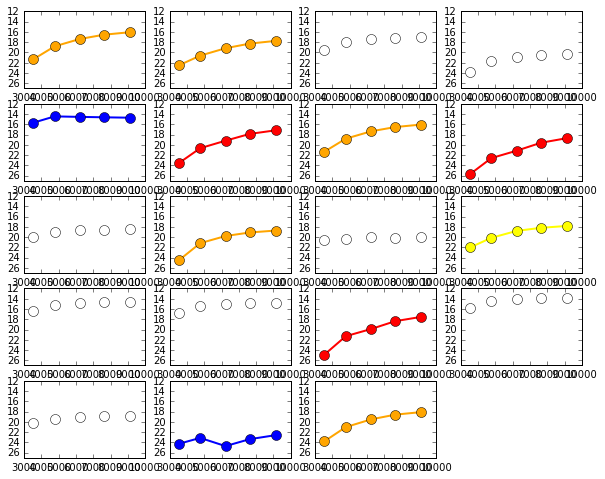

In [9]:
# Plot each star in its own window, and make sure that limits match for ease of comparison
plt.figure(figsize=(10,8))
for i in range(len(stars)):
    plt.subplot(5,4,i+1)
    mags = np.array([stars[i][b] for b in bands])
    plt.plot(central_wavelengths,mags,
             '-o',ms=10,color=stars["color"][i],lw=2)
    plt.ylim(27,12)
#plt.xlabel("g",fontsize="x-large")
#plt.ylabel("r",fontsize="x-large")


It's hard to tell the difference between the white and blue stars; they're mostly flat

The red, orange, and yellow distributions all increase towards longer wavelengths.

Can you tell any difference among those?

It looks like the red distributions are steepest/increase the most, while the orange are a little flatter and the yellow are flatter still. 

How can we quantify that?

In [10]:
# Calculate the difference between the magnitudes at the blue and red end
# Subtracting blue from red to get a positive magnitude, 
# (but students could very easily see the brighter red wavelengths and try red-blue)
# Students may also try to calculate it as a slope, and do delta-magnitude over delta-wavelength
mag_diff = stars["u"] - stars["z"]

# Sort by this magnitude difference, then print the visible colors in that order
sort_diff = np.argsort(mag_diff)
print(stars["color"][sort_diff])

color 
------
 white
  blue
 white
 white
  blue
 white
 white
 white
 white
 white
yellow
orange
orange
orange
orange
orange
   red
   red
   red
